# Requirements

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Add as many imports as you need.

## Customer Personality Analysis

## Read the dataset

# Dataset Description

## Attributes

### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years

### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
The column Response is the prediction target.
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


In [1]:
import pandas as pd

Load the dataset into a `pandas` data frame.

In [5]:
df=pd.read_csv("marketing_campaign.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,NaN,1954.0,NaN,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0.0,1.0,13-06-2013,46.0,709.0,43.0,247.0,2.0,NaN,3.0,4.0,NaN,NaN,0.0,NaN
2236,4001.0,1946.0,PhD,Together,NaN,2.0,1.0,10/6/2014,56.0,406.0,0.0,NaN,7.0,NaN,2.0,5.0,7.0,1.0,0.0,0.0
2237,7270.0,1981.0,Graduation,Divorced,NaN,0.0,NaN,25-01-2014,91.0,908.0,48.0,24.0,1.0,2.0,3.0,13.0,NaN,0.0,NaN,0.0
2238,8235.0,1956.0,Master,NaN,69245.0,0.0,1.0,NaN,8.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0


Explore the dataset using visualizations of your choice.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

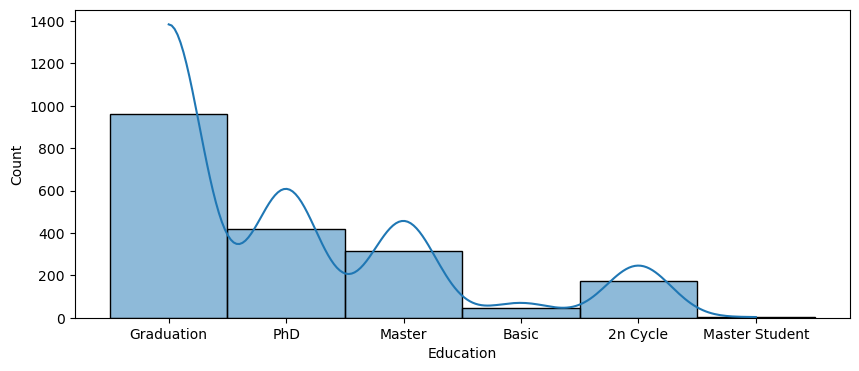

In [144]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Education'], bins=10, kde=True)
plt.show()

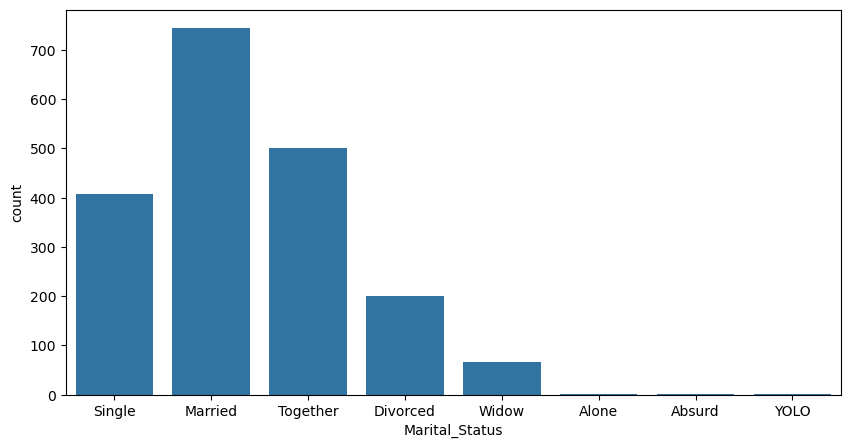

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', data=df)
plt.show()

Check if the dataset is balanced.

In [23]:
response_counts = df['Response'].value_counts()
print("Response Distribution:")
print(response_counts)

Response Distribution:
Response
0.0    1627
1.0     273
Name: count, dtype: int64


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [27]:
df1=df.copy()

In [29]:
df1.isnull().sum()/len(df1)*100

ID                     13.750000
Year_Birth             14.062500
Education              14.241071
Marital_Status         14.107143
Income                 17.187500
Kidhome                14.241071
Teenhome               12.946429
Dt_Customer            13.883929
Recency                13.839286
MntWines               14.866071
MntFruits              13.839286
MntGoldProds           14.241071
NumDealsPurchases      13.571429
NumWebPurchases        14.866071
NumCatalogPurchases    15.178571
NumStorePurchases      14.508929
NumWebVisitsMonth      13.973214
AcceptedCmp1           13.214286
AcceptedCmp2           14.196429
Response               15.178571
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [42]:
df1=df1.drop(columns='ID')

<Axes: >

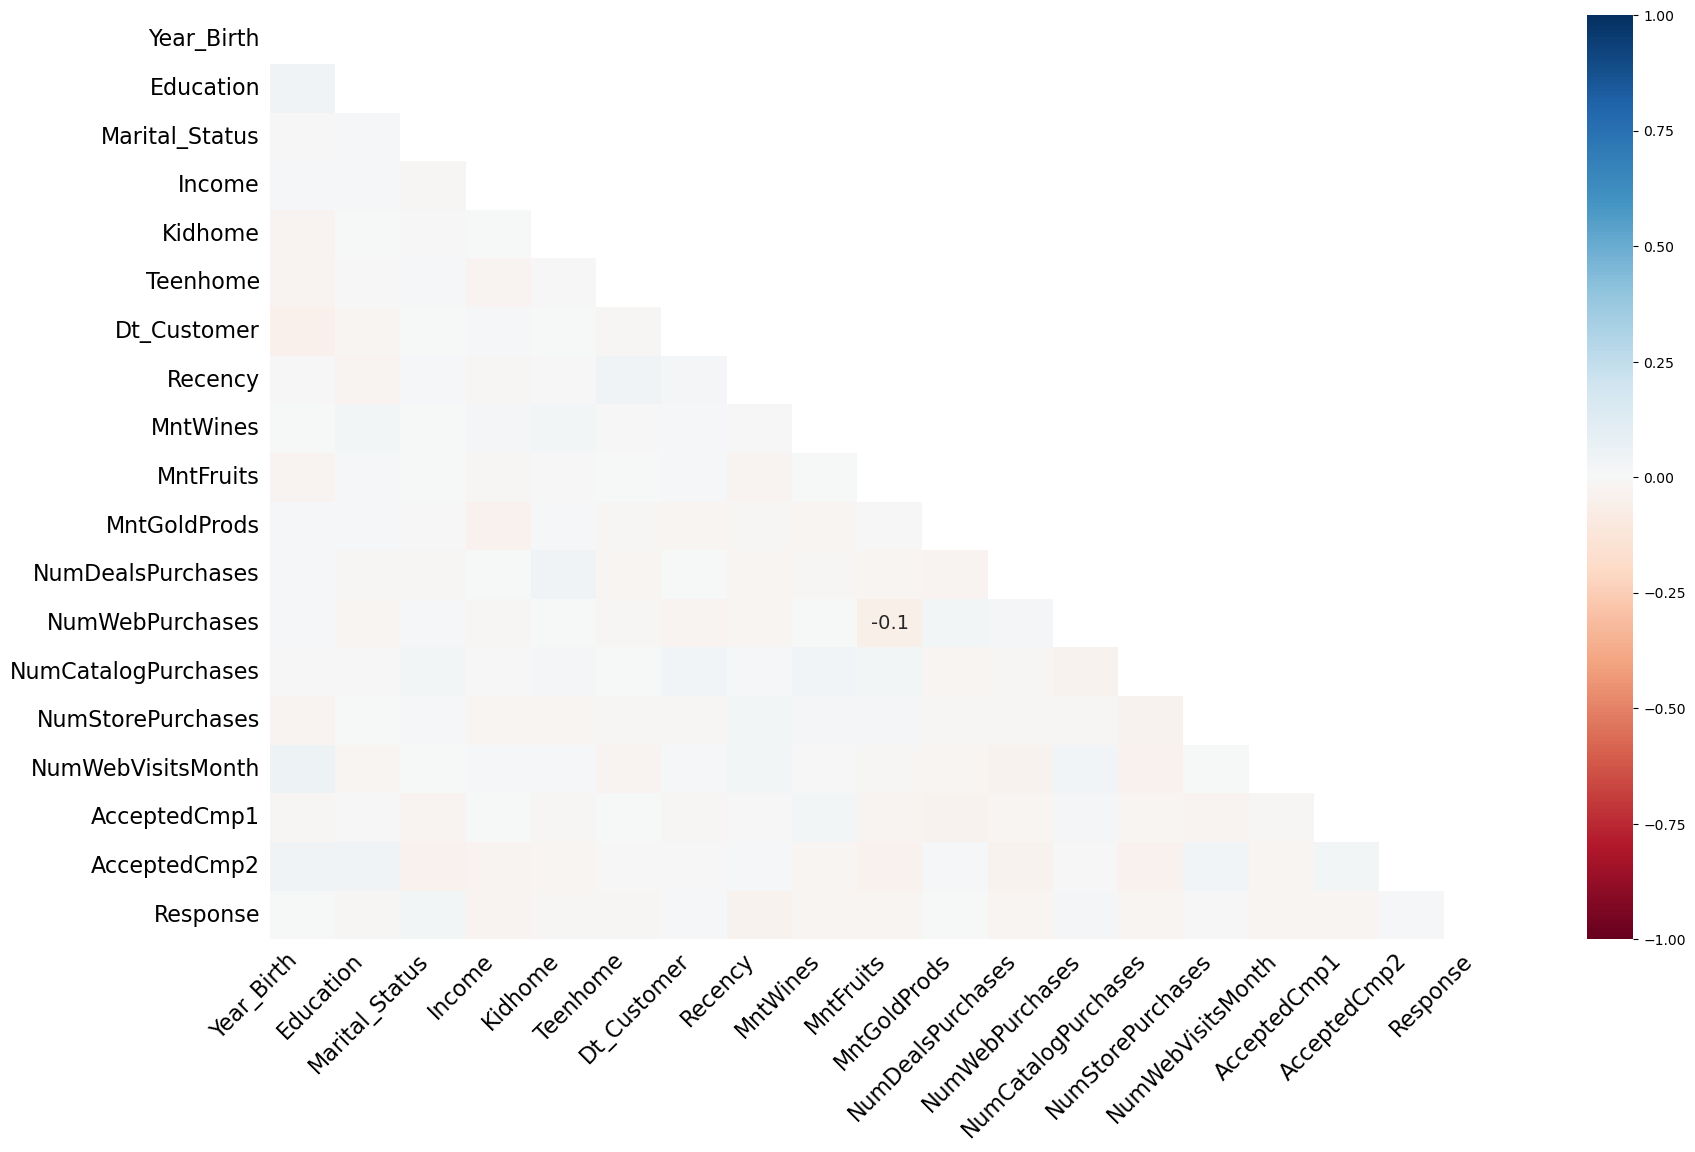

In [44]:
import missingno as msno
msno.heatmap(df1)

<Axes: >

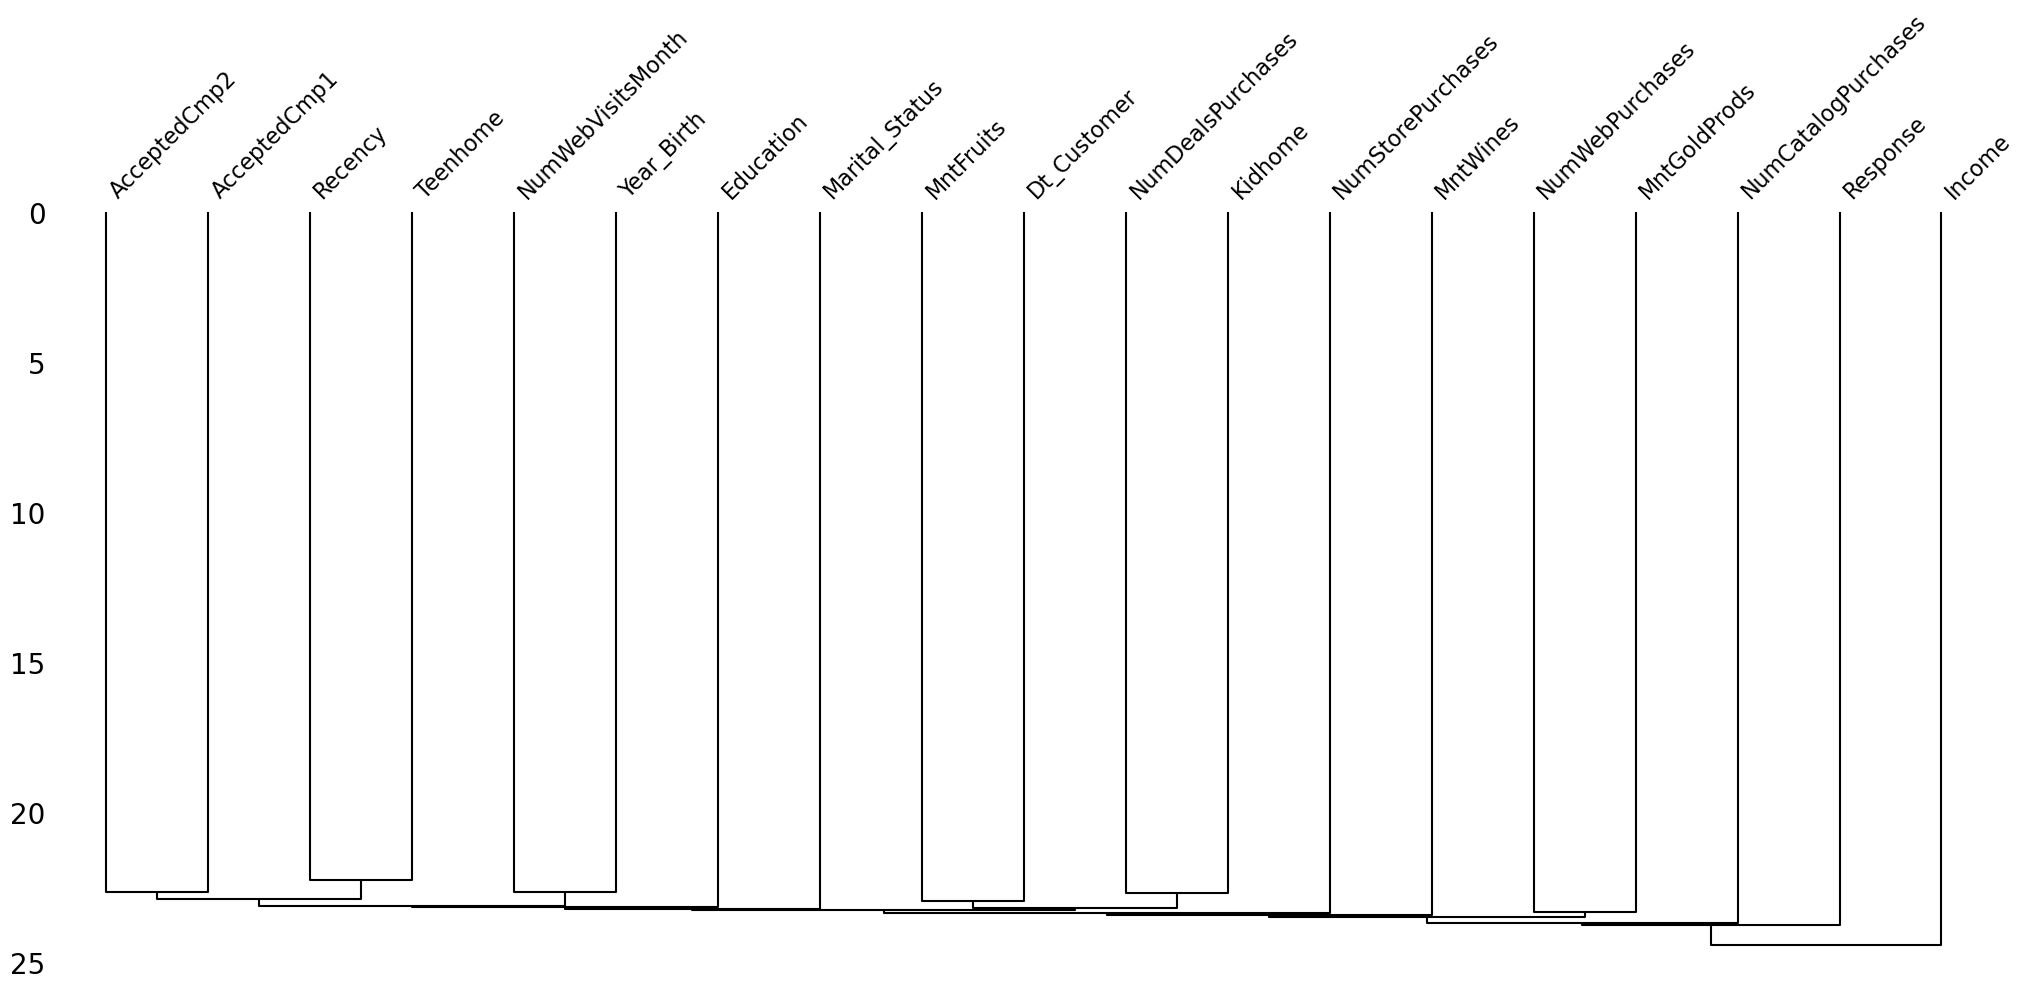

In [48]:
msno.dendrogram(df1)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

<Axes: xlabel='Marital_Status'>

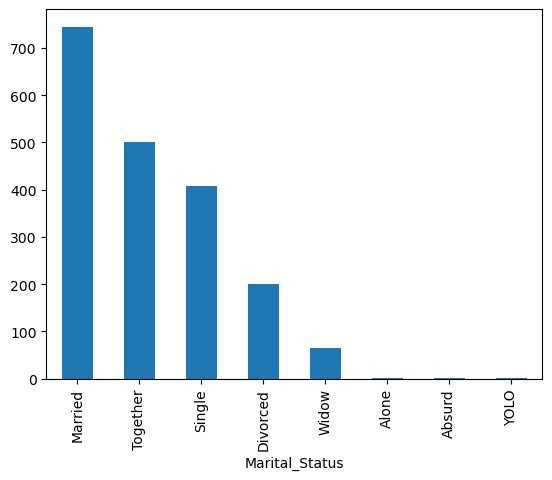

In [52]:
df1['Marital_Status'].value_counts().plot.bar()

In [54]:
numerical_columns = df1.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns.tolist())

Numerical columns: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']


In [56]:
df1.Year_Birth=df1.Year_Birth.fillna(df1.Year_Birth.mean())
df1['Year_Birth'].isnull().sum()

0

In [64]:
df1[numerical_columns] = df1[numerical_columns].fillna(df1[numerical_columns].median())
df1.isnull().sum()

Year_Birth               0
Education              319
Marital_Status         316
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer            311
Recency                  0
MntWines                 0
MntFruits                0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
dtype: int64

<Axes: xlabel='Education'>

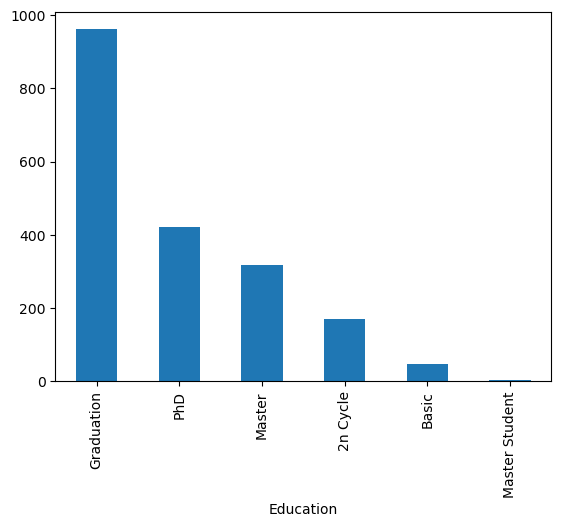

In [66]:
df1['Education'].value_counts().plot.bar()

In [70]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [74]:
frequent_imputer=SimpleImputer(strategy='most_frequent')
df1['Education']=df1['Education'].astype(str)
df1['Education']=frequent_imputer.fit_transform(df1['Education'].values.reshape(1, -1))[0]
df1['Education'].isnull().sum()

0

<Axes: xlabel='Marital_Status'>

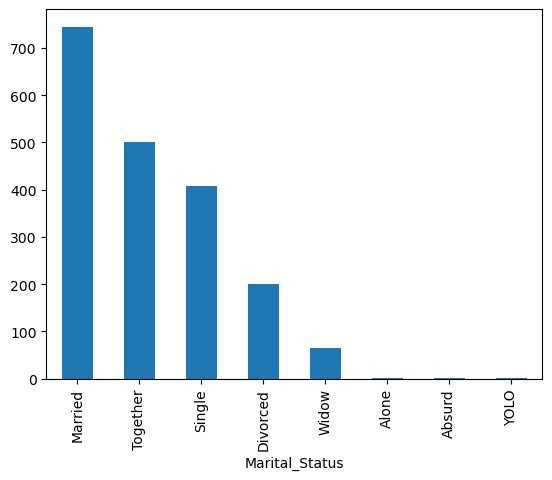

In [76]:
df1['Marital_Status'].value_counts().plot.bar()

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_status = encoder.fit_transform(df1['Marital_Status'].dropna())
df1['Marital_Status_Encoded'] = pd.Series(encoded_status, index=df1['Marital_Status'].dropna().index)
mean_encoded = df1['Marital_Status_Encoded'].mean()
df1['Marital_Status_Encoded'].fillna(mean_encoded, inplace=True)
print("Mean of encoded Marital_Status:", mean_encoded)


Mean of encoded Marital_Status: 3.7281704781704783


C:\Users\dimit\AppData\Local\Temp\ipykernel_1552\1261171572.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Marital_Status_Encoded'].fillna(mean_encoded, inplace=True)


In [90]:
df1['Marital_Status_Encoded'] = df1['Marital_Status_Encoded'].fillna(mean_encoded)
df1.isnull().sum()

Year_Birth                  0
Education                   0
Marital_Status            316
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer               311
Recency                     0
MntWines                    0
MntFruits                   0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp1                0
AcceptedCmp2                0
Response                    0
Marital_Status_Encoded      0
dtype: int64

In [96]:
df1['Marital_Status'].fillna(df1['Marital_Status'].mode()[0], inplace=True)

encoded_status = encoder.fit_transform(df1['Marital_Status'])
df1['Marital_Status_Encoded'] = encoded_status

print(df1.isnull().sum())

Year_Birth                  0
Education                   0
Marital_Status              0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer               311
Recency                     0
MntWines                    0
MntFruits                   0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp1                0
AcceptedCmp2                0
Response                    0
Marital_Status_Encoded      0
dtype: int64


In [102]:
df1=df1.drop(columns='Dt_Customer')

In [104]:
df1.isnull().sum()

Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Recency                   0
MntWines                  0
MntFruits                 0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp1              0
AcceptedCmp2              0
Response                  0
Marital_Status_Encoded    0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [130]:
numeric_df = df1.select_dtypes(include=[np.number])

print((~np.isfinite(numeric_df)).sum())

Year_Birth                0
Income                    0
Kidhome                   0
Teenhome                  0
Recency                   0
MntWines                  0
MntFruits                 0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp1              0
AcceptedCmp2              0
Response                  0
Marital_Status_Encoded    0
dtype: int64


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(numeric_df.drop(columns=['Response'])) 
y = numeric_df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## K-Nearset Neighbors Classification

In [136]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train,y_train) 

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [138]:
y_pred = knn.predict(X_test)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [142]:
# evaulira modelot
accuracy = accuracy_score(y_test, y_pred) #tocnost
print(f"Accuracy: {accuracy * 100:.2f}%") #vo procenti

# presmetuva cuvstvitelnost->brTocnoPredvideniPozitivniSLucai/vrBrojVistinskiPozSlucai
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred) #vr megju 0 i 1 kade pogolemo znaci podobra kombinacija od tocnost i cuvstvitelnost
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred) #kolku model gresi i kade gresi  so prikaz na site tocno i netocno predvideni slucai
print("Confusion Matrix:")
print(conf_matrix)

# Classification report (includes precision, recall, F1 score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 86.38%
Recall: 0.11
F1 Score: 0.16
Confusion Matrix:
[[381  12]
 [ 49   6]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       393
         1.0       0.33      0.11      0.16        55

    accuracy                           0.86       448
   macro avg       0.61      0.54      0.55       448
weighted avg       0.82      0.86      0.83       448

